<a href="https://colab.research.google.com/github/nithinnani122/MY-PROJECTS/blob/main/Play_store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
playstore_df = pd.read_csv("training data.csv", encoding="latin-1")
reviews_df = pd.read_csv("training data.csv", encoding="latin-1")

In [ ]:
# Display first few rows of both datasets to understand the structure
print("Play Store Apps Data:")
print(playstore_df.head())
print("\nCustomer Reviews Data:")
print(reviews_df.head())

Play Store Apps Data:
                               reviewId           userName  \
0  495266a4-f451-48c3-a844-fb3c07560d55     Foysal Hossain   
1  947fcd83-7a28-403d-b03b-d0bc20f52e0e          S K VERMA   
2  65856211-67ba-4560-84dd-a0055775ed90      Amanuel Abara   
3  cd5ba250-3a26-43b4-a378-77d18f73a503  Vagarangas X Aopi   
4  e8e886b4-d6c6-416b-b0a1-be90320c4024       Shafin islam   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                               content  score  thumbsUpCount  \
0  Gett van for no reason ????????????      1              0   
1                better' than WhatsApp      4              0   
2             That was good app for me      5              0   
3           

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

In [ ]:
# Check the info of both datasets to understand the columns and data types
print("\nPlay Store Apps Data Info:")
print(playstore_df.info())
print("\nCustomer Reviews Data Info:")
print(reviews_df.info())


Play Store Apps Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 415 to 5995
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              163 non-null    object
 1   userName              163 non-null    object
 2   userImage             163 non-null    object
 3   content               163 non-null    object
 4   score                 163 non-null    int64 
 5   thumbsUpCount         163 non-null    int64 
 6   reviewCreatedVersion  163 non-null    object
 7   at                    163 non-null    object
 8   replyContent          163 non-null    object
 9   repliedAt             163 non-null    object
 10  appVersion            163 non-null    object
 11  userLang              163 non-null    object
 12  app_id                163 non-null    object
dtypes: int64(2), object(11)
memory usage: 17.8+ KB
None

Customer Reviews Data Info:
<class 'pandas.core.frame.Da

In [ ]:
# Data cleaning and preprocessing
# Handle missing values
playstore_df.dropna(inplace=True)
reviews_df.dropna(inplace=True)

In [ ]:
# Remove duplicates
playstore_df.drop_duplicates(inplace=True)
reviews_df.drop_duplicates(inplace=True)


In [ ]:
print(playstore_df.columns)
print(reviews_df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')
Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')


In [ ]:
print(playstore_df.columns)
print(reviews_df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')
Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')


In [ ]:
playstore_df.head()
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,userLang,app_id
415,d9246eeb-15ef-4d21-9f4e-1cd4a4104e02,M. A.,https://play-lh.googleusercontent.com/a/ACg8oc...,"Alles im allen ganz ok, allerdings nervt die n...",3,9,5.6.0,16-09-2023 13:13,"Hallo, der Chat ""Gespeichertes"" ist ideal als ...",22-07-2021 16:51,5.6.0,DE,org.telegram.messenger
436,96edac7d-5297-4c30-9406-8dddb8f76777,Daniel Schenk (kristallzucker2007),https://play-lh.googleusercontent.com/a/ACg8oc...,"St??ndig Updates, NERVT gestern 24.08.23 berei...",1,23,10.0.6,13-09-2023 21:11,"Hallo, die letzten waren am 20. M??rz und vorg...",18-04-2022 20:50,10.0.6,DE,org.telegram.messenger
437,8612f1bf-dd32-431d-81d5-759e58665635,S .S,https://play-lh.googleusercontent.com/a-/ALV-U...,Albanische sprechen bitte und fremde Leute sch...,3,6,10.0.5,13-09-2023 19:02,"Tung, schau mal hier: https://translations.tel...",12-03-2022 04:35,10.0.5,DE,org.telegram.messenger
508,cfd281a3-3fd3-49eb-b687-33c8705343c4,Ein Google-Nutzer,https://play-lh.googleusercontent.com/EGemoI2N...,Standardm????ig keine Ende-zu-Ende-Verschl?¬ss...,3,37,10.0.5,02-09-2023 23:09,Was ist bei unserem Protokoll nicht sicher? Me...,18-10-2016 10:31,10.0.5,DE,org.telegram.messenger
549,8fed1372-64bd-4173-9b03-19fe42e9ee24,Fridruf Hau,https://play-lh.googleusercontent.com/a/ACg8oc...,"stories, vollkommene sch...e und es l??sst sic...",4,3,10.0.4,29-08-2023 13:10,Stories von deinen Kontakten nehmen in der Tel...,27-08-2023 09:02,10.0.4,DE,org.telegram.messenger


In [ ]:
merged_df = pd.merge(playstore_df, reviews_df, on='app_id', how='inner')

In [ ]:
# Data analysis
# Summary statistics
print("\nSummary Statistics of Merged Data:")
print(merged_df.describe())


Summary Statistics of Merged Data:
            score_x  thumbsUpCount_x       score_y  thumbsUpCount_y
count  11949.000000     11949.000000  11949.000000     11949.000000
mean       2.482969         4.950205      2.482969         4.950205
std        1.580551        14.723303      1.580551        14.723303
min        1.000000         0.000000      1.000000         0.000000
25%        1.000000         0.000000      1.000000         0.000000
50%        2.000000         0.000000      2.000000         0.000000
75%        4.000000         2.000000      4.000000         2.000000
max        5.000000       271.000000      5.000000       271.000000


In [ ]:
print("\nSummary Statistics of Merged Data:")
print(merged_df.describe())



Summary Statistics of Merged Data:
            score_x  thumbsUpCount_x       score_y  thumbsUpCount_y
count  11949.000000     11949.000000  11949.000000     11949.000000
mean       2.482969         4.950205      2.482969         4.950205
std        1.580551        14.723303      1.580551        14.723303
min        1.000000         0.000000      1.000000         0.000000
25%        1.000000         0.000000      1.000000         0.000000
50%        2.000000         0.000000      2.000000         0.000000
75%        4.000000         2.000000      4.000000         2.000000
max        5.000000       271.000000      5.000000       271.000000


In [ ]:
print(merged_df.columns)


Index(['reviewId_x', 'userName_x', 'userImage_x', 'content_x', 'score_x',
       'thumbsUpCount_x', 'reviewCreatedVersion_x', 'at_x', 'replyContent_x',
       'repliedAt_x', 'appVersion_x', 'userLang_x', 'app_id', 'reviewId_y',
       'userName_y', 'userImage_y', 'content_y', 'score_y', 'thumbsUpCount_y',
       'reviewCreatedVersion_y', 'at_y', 'replyContent_y', 'repliedAt_y',
       'appVersion_y', 'userLang_y'],
      dtype='object')


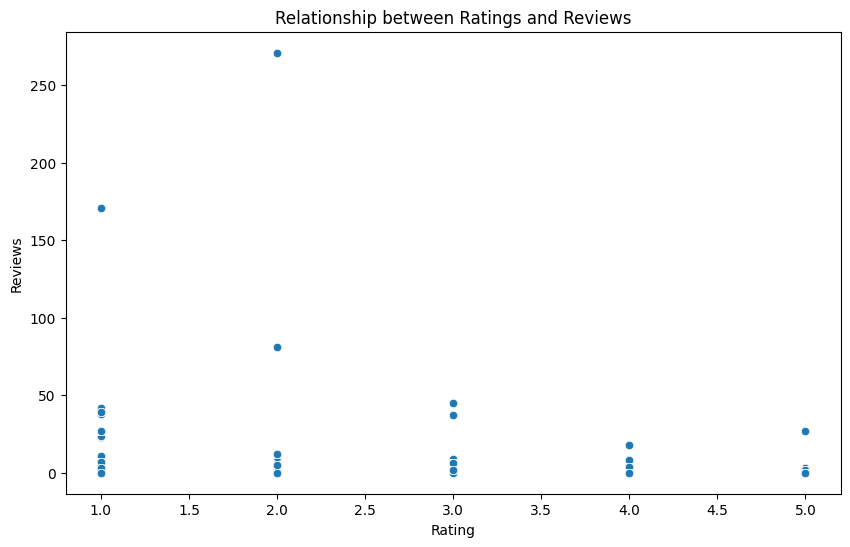

In [ ]:
# Visualizations
# Relationship between ratings and reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_x', y='thumbsUpCount_x', data=merged_df)
plt.title('Relationship between Ratings and Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()


<ipython-input-32-1886bd6f2557>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


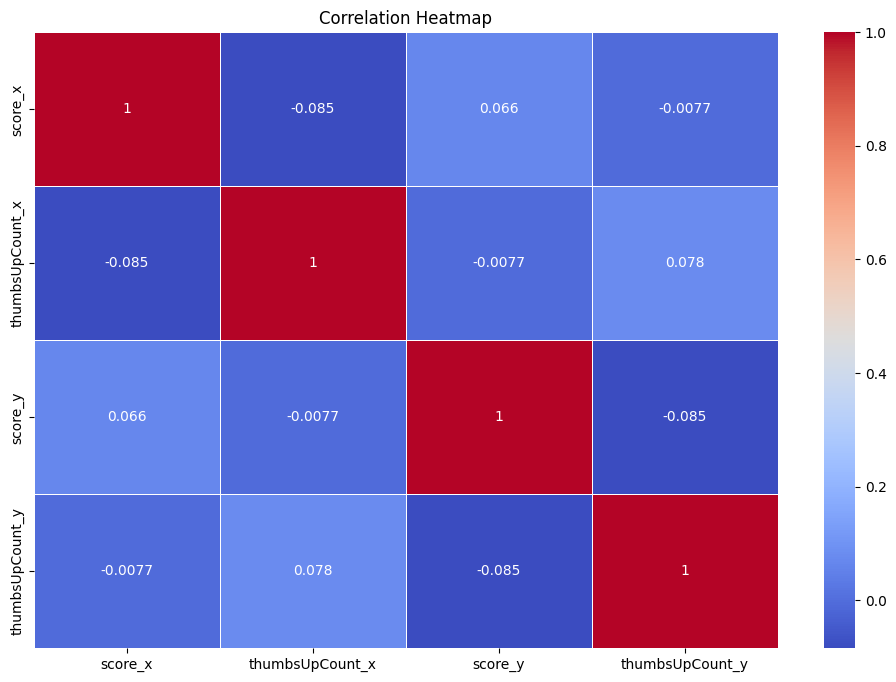

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

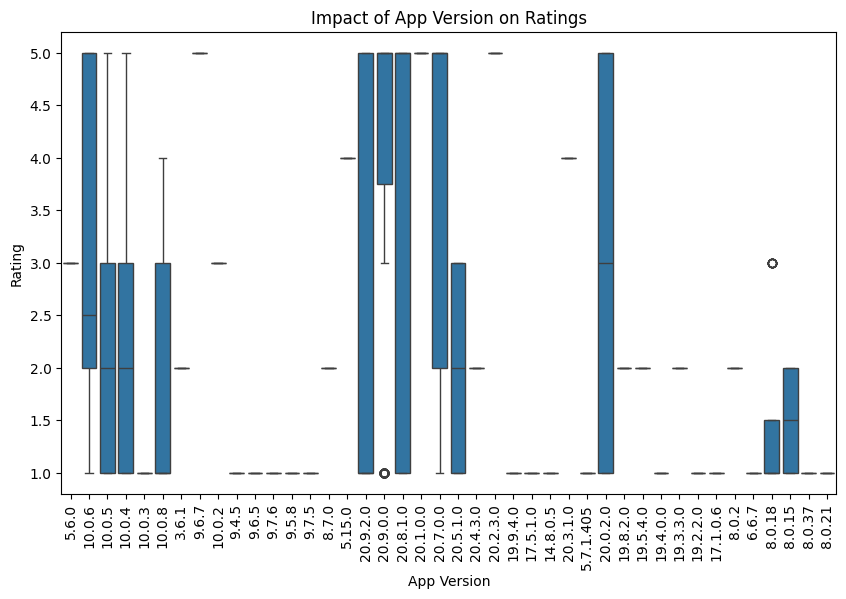

In [ ]:
# Explore other features and their impact on app engagement and success
# Example:
# Impact of app version on ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='appVersion_x', y='score_x', data=merged_df)
plt.title('Impact of App Version on Ratings')
plt.xlabel('App Version')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()